# Capstone Project: Histopathologic Cancer Detection

Identify metastatic tissue in histopathologic scans of lymph node sections

In [1]:
# Import all libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv

from glob import glob

%matplotlib inline

In [2]:
# Paths to train and test data
train_folder = '.\\train\\'
test_folder = '.\\test\\'

# Prepare a dataframe to store complete path to images and its IDs
df_img = pd.DataFrame({'path': glob(os.path.join(train_folder,'*.tif'))})
df_img['id'] = df_img.path.map(lambda x: x.split('\\')[2].split(".")[0])

# Prepare dataframe with labeled train data
df_train = pd.read_csv('train_labels.csv')

# Join (Merge) dataframes on ID
df = df_train.merge(df_img, on = "id")

# Create a column to represent the image as RGB array 
df['rgb'] = df['path'].apply(lambda x: cv.cvtColor(cv.imread(x), cv.COLOR_BGR2RGB))

In [3]:
# Quick look our dataframe
df.head(5)

,id,label,path,rgb
0,000020de2aa6193f4c160e398a8edea95b1da598,0,.\train\000020de2aa6193f4c160e398a8edea95b1da5...,"[[[242, 246, 245], [242, 246, 245], [244, 246,..."
1,00011545a495817817c6943583b294c900a137b8,0,.\train\00011545a495817817c6943583b294c900a137...,"[[[255, 250, 255], [247, 234, 243], [255, 250,..."
2,0000d563d5cfafc4e68acb7c9829258a298d9b6a,0,.\train\0000d563d5cfafc4e68acb7c9829258a298d9b...,"[[[236, 236, 244], [238, 235, 244], [240, 232,..."
3,000126ec42770c7568204e2f6e07eb9a07d5e121,0,.\train\000126ec42770c7568204e2f6e07eb9a07d5e1...,"[[[68, 28, 142], [96, 51, 154], [123, 73, 162]..."
4,00004aab08381d25d315384d646f5ce413ea24b1,0,.\train\00004aab08381d25d315384d646f5ce413ea24...,"[[[214, 198, 224], [110, 94, 105], [188, 169, ..."


In [4]:
def plot_samples(df):
    """
    Function to plot random sample of images.
    Based on the code from Joni Juvonen at:
    https://www.kaggle.com/qitvision/a-complete-ml-pipeline-fast-ai
    
    Args:
        df (dataframe): A dataframe containing one column with the image as RGB array.
    """
    
    # Define the figure's properties
    fig, ax = plt.subplots(2,5, figsize=(20,8))
    fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)

    # Prepare negative samples
    for i, rgb in enumerate(df[df['label'] == 0]['rgb'][:5]):
        ax[0,i].imshow(rgb)
        # Create a Rectangle patch
        box = patches.Rectangle((32,32),32,32
                               ,linewidth = 4
                               ,edgecolor = 'b'
                               ,facecolor = 'none'
                               ,linestyle = ':'
                               ,capstyle = 'round')
        ax[0,i].add_patch(box)
    ax[0,0].set_ylabel('Negative samples', size='large')

    # Prepare positive samples
    for i, rgb in enumerate(df[df['label'] == 1]['rgb'][:5]):
        ax[1,i].imshow(rgb)
        # Create a Rectangle patch
        box = patches.Rectangle((32,32),32,32
                               ,linewidth = 4
                               ,edgecolor = 'r'
                               ,facecolor = 'none'
                               ,linestyle = ':'
                               ,capstyle = 'round')
        ax[1,i].add_patch(box)
    ax[1,0].set_ylabel('Positive samples', size='large')

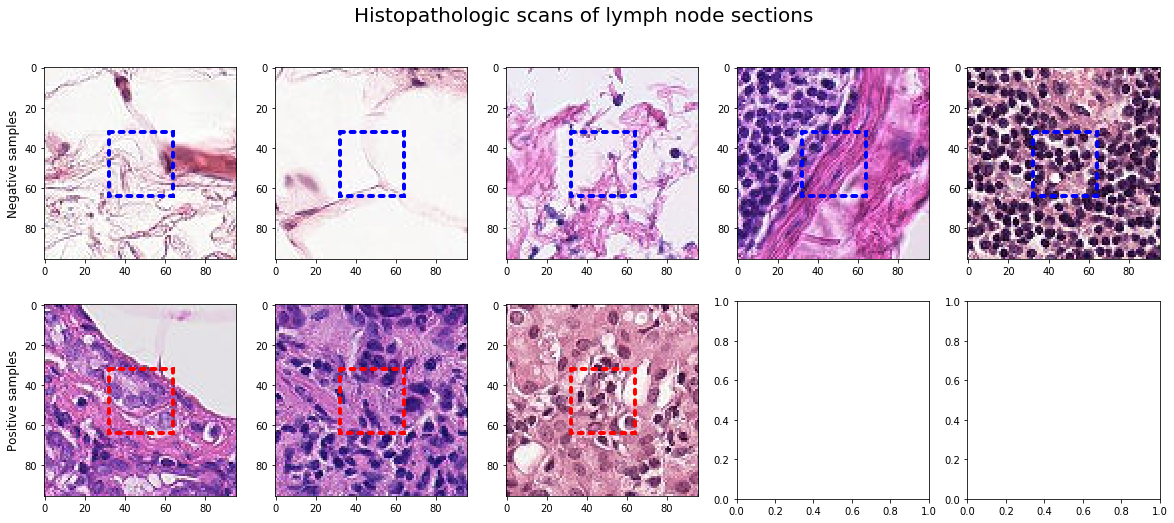

In [5]:
plot_samples(df)

In [22]:
def plot_label_distribution(df):
    """
    Function to plot label distribution.
    Based on the code from Pablo Gomez at:
    https://www.kaggle.com/gomezp/complete-beginner-s-guide-eda-keras-lb-0-93
    
    Args:
        df (dataframe): A dataframe containing one column with the image label 
                       (Negative == 0 and Positive == 1).
    """
    # Get only the label data
    y = df['label'].copy() 

    # Define the figure's properties
    fig = plt.figure(figsize=(4, 2),dpi=150)

    # Prepare the bar chart data and properties
    plt.bar(y.unique()
           ,[(y == 0).sum()
            ,(y == 1).sum()]
           ); 

    plt.xticks([0,1]
              ,["Negative (N={})".format((y == 0).sum())
               ,"Positive (N={})".format((y == 1).sum())]
              );

    plt.ylabel("# of Samples")

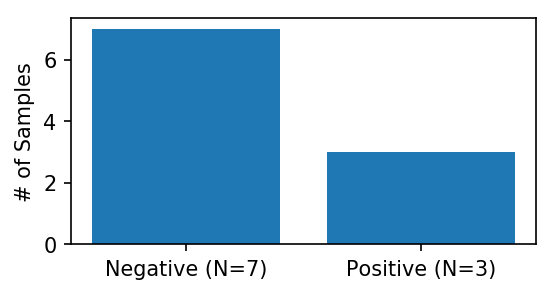

In [24]:
plot_label_distribution(df)

In [ ]:
positive_samples = X[y == 1]
negative_samples = X[y == 0]

nr_of_bins = 256 #each possible pixel value will get a bin in the following histograms
fig,axs = plt.subplots(4,2,sharey=True,figsize=(8,8),dpi=150)

#RGB channels
axs[0,0].hist(positive_samples[:,:,:,0].flatten(),bins=nr_of_bins,density=True)
axs[0,1].hist(negative_samples[:,:,:,0].flatten(),bins=nr_of_bins,density=True)
axs[1,0].hist(positive_samples[:,:,:,1].flatten(),bins=nr_of_bins,density=True)
axs[1,1].hist(negative_samples[:,:,:,1].flatten(),bins=nr_of_bins,density=True)
axs[2,0].hist(positive_samples[:,:,:,2].flatten(),bins=nr_of_bins,density=True)
axs[2,1].hist(negative_samples[:,:,:,2].flatten(),bins=nr_of_bins,density=True)

#All channels
axs[3,0].hist(positive_samples.flatten(),bins=nr_of_bins,density=True)
axs[3,1].hist(negative_samples.flatten(),bins=nr_of_bins,density=True)

#Set image labels
axs[0,0].set_title("Positive samples (N =" + str(positive_samples.shape[0]) + ")");
axs[0,1].set_title("Negative samples (N =" + str(negative_samples.shape[0]) + ")");
axs[0,1].set_ylabel("Red",rotation='horizontal',labelpad=35,fontsize=12)
axs[1,1].set_ylabel("Green",rotation='horizontal',labelpad=35,fontsize=12)
axs[2,1].set_ylabel("Blue",rotation='horizontal',labelpad=35,fontsize=12)
axs[3,1].set_ylabel("RGB",rotation='horizontal',labelpad=35,fontsize=12)
for i in range(4):
    axs[i,0].set_ylabel("Relative frequency")
axs[3,0].set_xlabel("Pixel value")
axs[3,1].set_xlabel("Pixel value")
fig.tight_layout()